In [1]:
import pandas as pd
import matplotlib.pyplot as plt

voksne = pd.read_csv('voksne.csv', sep='\t')
unge = pd.read_csv('unge.csv', sep='\t')
eldre = pd.read_csv('eldre.csv', sep='\t')
smabarn = pd.read_csv('småbarn.csv', sep='\t')
alle = pd.concat([unge, voksne, eldre])
covid = pd.read_csv('covidSymptomer.csv', sep='\t')
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# b) Finn den første, midterste og siste tallet i den 3. kollone i rammen for unge pasienter
a = len(unge) / 2

first = unge.iloc[0, 2]
middle = unge.iloc[int(len(unge) / 2), 2]
last = unge.iloc[-1, 2]
resultat = f'First middle and last value in the third column {first, middle, last}'
print(resultat)

First middle and last value in the third column (207777, 471, 351503)


In [3]:
# c)
data = eldre[(eldre['2021'] - eldre['2012']) < 0]
data['Diagnose']

0    Luftveisinfeksjon
8               Hjerte
Name: Diagnose, dtype: object

In [4]:
# d)
alleD = pd.concat([unge, eldre, voksne]).set_index('Diagnose')
# alle.set_index('Diagnose')
alleD

,aldersgruppe,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Diagnose,,,,,,,,,,,
Luftveisinfeksjon,unge,207777,182705,172924,186045,224979,256357,252069,246269,140698,126724
Lokale smerter,unge,85006,87147,91722,92707,93147,95076,90989,93219,82919,92252
Rygg,unge,17031,16953,17933,17601,17813,18517,16806,16866,14518,15859
smerter/muskel,unge,6843,6922,7283,7099,6957,6755,6148,6281,5455,5726
Gikt/ledd,unge,7406,7366,7878,7840,7950,8251,7758,7974,7389,7558
...,...,...,...,...,...,...,...,...,...,...,...
Svangerskap/Prevensjon,voksne,531718,524216,519064,521336,513818,503492,505853,489979,521734,536536
Frykt for sykdom,voksne,58803,61724,62094,59789,58039,59788,61326,63618,300955,148422
Admin,voksne,136871,136039,160512,169374,189246,178328,215131,277246,397822,481757


In [5]:
# e)
# alle.set_index('Diagnose')
ramme = alleD[alleD['aldersgruppe'].isin(['unge', 'voksne'])]
diabetes = ramme.loc[['Diabetes'], ['2019', '2020', '2021']].sum()
diabetes

2019    206679
2020    223109
2021    236908
dtype: int64

In [6]:
diabetes.to_dict()
print('Antall diabetes-konsultasjoner blant unge og voksne')
for i, v in diabetes.items():
    print(f'{i}: {v}')

Antall diabetes-konsultasjoner blant unge og voksne
2019: 206679
2020: 223109
2021: 236908


In [7]:
# g)
U = alle[alle['aldersgruppe'] == 'unge']
tekst = U[['Diagnose', 'aldersgruppe']]
# tekst.head()

årstall = [str(år) for år in range(2012, 2021+1)]
tall = unge[årstall] + smabarn[årstall]
tall

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,476605,419666,414120,409576,454768,474749,458490,450904,258624,294939
1,94571,96844,101530,102494,103332,105370,101178,103382,93372,102726
2,17392,17339,18308,17941,18147,18861,17129,17207,14849,16203
3,7563,7583,7953,7804,7616,7410,6752,6851,6131,6446
4,8088,8027,8556,8417,8612,8913,8379,8453,7929,8049
5,92203,94032,98100,101972,107448,118120,121596,126482,137299,163638
6,147188,143236,157016,152482,157769,166430,165130,174908,182025,192742
7,308,314,319,360,340,296,264,231,309,291
8,2045,2033,2028,1940,1850,1739,1782,1807,1751,1830
9,1785,1920,1921,1859,1943,1729,1851,1809,2142,2116


In [8]:
unge_og_små = pd.concat([tekst, tall], axis=1)
unge_og_små

# Her var jeg ikke sikker på om de var ønsket at den oppdarte unge ble lagt til alle variabelen siden i oppg i so blir svaret det samme for hvert år om man gjør det,
# men i eksempel svaret i oppgaven er det ikke gjort
# ikkeUnge = alle[alle['aldersgruppe'].isin(['voksne', 'eldre'])]
# nyAlle = pd.concat([ikkeUnge, Unge]).reset_index(drop=True)
# nyAlle.head(100)

,Diagnose,aldersgruppe,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Luftveisinfeksjon,unge,476605,419666,414120,409576,454768,474749,458490,450904,258624,294939
1,Lokale smerter,unge,94571,96844,101530,102494,103332,105370,101178,103382,93372,102726
2,Rygg,unge,17392,17339,18308,17941,18147,18861,17129,17207,14849,16203
3,smerter/muskel,unge,7563,7583,7953,7804,7616,7410,6752,6851,6131,6446
4,Gikt/ledd,unge,8088,8027,8556,8417,8612,8913,8379,8453,7929,8049
5,Psykisk,unge,92203,94032,98100,101972,107448,118120,121596,126482,137299,163638
6,Astma/allergi/eksem,unge,147188,143236,157016,152482,157769,166430,165130,174908,182025,192742
7,Blodtrykk,unge,308,314,319,360,340,296,264,231,309,291
8,Hjerte,unge,2045,2033,2028,1940,1850,1739,1782,1807,1751,1830
9,Diabetes,unge,1785,1920,1921,1859,1943,1729,1851,1809,2142,2116


In [9]:
# h) Slå sammen diagnosene 'Lokale smerter' og 'smerter/muskel' til diagnosen 'Smerter'
lokal_smerte = alle[alle['Diagnose'] == 'Lokale smerter'].copy().reset_index().set_index('aldersgruppe')
smertermuskel = alle[alle['Diagnose'] == 'smerter/muskel'].copy().reset_index().set_index('aldersgruppe')

lokal_smerte

,index,Diagnose,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
aldersgruppe,,,,,,,,,,,,
unge,1,Lokale smerter,85006,87147,91722,92707,93147,95076,90989,93219,82919,92252
voksne,1,Lokale smerter,829990,847211,866750,873401,874537,884672,870706,881193,898678,961588
eldre,1,Lokale smerter,160553,168749,177200,185097,191106,197391,198748,207150,208598,223730


In [10]:
smertermuskel

,index,Diagnose,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
aldersgruppe,,,,,,,,,,,,
unge,3,smerter/muskel,6843,6922,7283,7099,6957,6755,6148,6281,5455,5726
voksne,3,smerter/muskel,155845,158006,158574,161350,163509,167724,160368,164960,169212,183562
eldre,3,smerter/muskel,22688,22895,22880,23850,24375,25555,23819,24795,26281,28553


In [11]:
sum = lokal_smerte.copy().assign(Diagnose='Smerter')

year_cols = ['2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
sum[year_cols] = sum[year_cols].add(smertermuskel[year_cols])
sum = sum.reset_index()

sum

,aldersgruppe,index,Diagnose,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,unge,1,Smerter,91849,94069,99005,99806,100104,101831,97137,99500,88374,97978
1,voksne,1,Smerter,985835,1005217,1025324,1034751,1038046,1052396,1031074,1046153,1067890,1145150
2,eldre,1,Smerter,183241,191644,200080,208947,215481,222946,222567,231945,234879,252283


In [12]:
nyAlle2 = alle.copy().drop(alle[alle['Diagnose'] == 'Lokale smerter'].index)
nyAlle2 = nyAlle2.drop(alle[alle['Diagnose'] == 'smerter/muskel'].index)

nyAlle2 = pd.concat([nyAlle2, sum]).drop('index', axis=1)

alle = nyAlle2.reset_index(drop=True).drop_duplicates()
alle

,Diagnose,aldersgruppe,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Luftveisinfeksjon,unge,207777,182705,172924,186045,224979,256357,252069,246269,140698,126724
1,Rygg,unge,17031,16953,17933,17601,17813,18517,16806,16866,14518,15859
2,Gikt/ledd,unge,7406,7366,7878,7840,7950,8251,7758,7974,7389,7558
3,Psykisk,unge,85405,87108,90671,94330,99540,110037,113348,117637,126674,151904
4,Astma/allergi/eksem,unge,87600,83914,95579,91897,94740,99303,98777,107523,113467,116081
5,Blodtrykk,unge,298,296,299,346,325,287,254,217,292,276
6,Hjerte,unge,1231,1253,1209,1125,1116,1042,1046,1092,1095,1208
7,Diabetes,unge,1681,1785,1771,1715,1816,1619,1749,1709,2009,1979
8,Kreft,unge,471,478,399,429,473,354,323,377,452,458
9,Underliv (kvinner),unge,16057,17021,17751,17515,17857,19232,19987,21345,22100,23643


In [13]:
# i)
test2 = ['Luftveisinfeksjon', 'Hud', 'Ulykke/skade', 'Frykt for sykdom', 'Smerter']
test3 = ['unge', 'eldre']
test4 = ['2012', '2015', '2018', '2021']
keep_cols = ['Diagnose', 'aldersgruppe']


def MinMaxDiagnose(diagnoser=None, aldersgrupper=None, aar=None):
    df = alle.loc[(alle['Diagnose'].isin(diagnoser)) & (alle['aldersgruppe'].isin(aldersgrupper))].reset_index()
    trimmed = df[df.columns.intersection(keep_cols + aar)]
    print(trimmed)
    for i in aar:
        ferrest = trimmed.iloc[trimmed[i].idxmin(), :2].to_dict()
        flest = trimmed.iloc[trimmed[i].idxmax(), :2].to_dict()
        print(
            f'{i} Ferrest: {ferrest["aldersgruppe"]}/{ferrest["Diagnose"]}, Flest: {flest["aldersgruppe"]}/{flest["Diagnose"]}')


df = MinMaxDiagnose(test2, test3, test4)

            Diagnose aldersgruppe    2012    2015    2018    2021
0  Luftveisinfeksjon         unge  207777  186045  252069  126724
1                Hud         unge   61067   65849   68750   69227
2       Ulykke/skade         unge   63216   63962   65080   58756
3   Frykt for sykdom         unge    7917    8165    8178   27643
4  Luftveisinfeksjon        eldre  138333  141766  150473   79484
5                Hud        eldre   39048   43685   51013   53256
6       Ulykke/skade        eldre   68831   78826   88485   91016
7   Frykt for sykdom        eldre   11627   11545   11887   21487
8            Smerter         unge   91849   99806   97137   97978
9            Smerter        eldre  183241  208947  222567  252283
2012 Ferrest: unge/Frykt for sykdom, Flest: unge/Luftveisinfeksjon
2015 Ferrest: unge/Frykt for sykdom, Flest: eldre/Smerter
2018 Ferrest: unge/Frykt for sykdom, Flest: unge/Luftveisinfeksjon
2021 Ferrest: eldre/Frykt for sykdom, Flest: eldre/Smerter


<Axes: ylabel='Luftveisinfeksjon'>

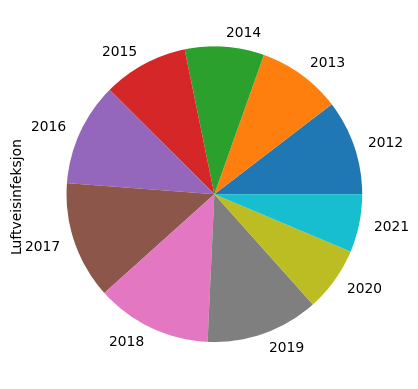

In [14]:
# j)
# 0 er lufftveisinfeksjon
row = alle.iloc[0].drop(['Diagnose', 'aldersgruppe'])
plot = row.plot(ylabel='Luftveisinfeksjon',kind='pie')
plot

In [15]:
# k)
covid

,Symptom,vanlig,mindre vanlig,alvorlig
0,Luftveisinfeksjon,ja,ja,nei
1,Smerter,nei,ja,ja
2,Mage/Tarm,nei,ja,nei
3,Hud,nei,ja,nei
4,Sanser,ja,nei,nei
5,Lunge,ja,nei,ja
6,Bryst,nei,nei,ja


<Axes: >

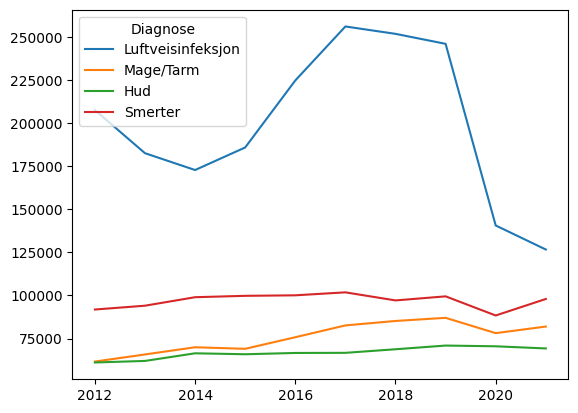

In [19]:
covidplt = alle.copy().loc[alle['Diagnose'].isin(covid['Symptom'])].reset_index()
covidplt = covidplt[covidplt['aldersgruppe'].str.contains('unge') == True]
covidplt.drop(['index', 'aldersgruppe'], inplace=True, axis=1)

covidplt.set_index('Diagnose', inplace=True)
covidplt = covidplt.transpose()
covidplt.plot(kind='line')

In [17]:
covidplt

,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Diagnose,,,,,,,,,,
Luftveisinfeksjon,207777,182705,172924,186045,224979,256357,252069,246269,140698,126724
Mage/Tarm,61596,65729,69913,69012,75744,82606,85190,87018,78115,81952
Hud,61067,61964,66404,65849,66599,66673,68750,70898,70473,69227
Smerter,91849,94069,99005,99806,100104,101831,97137,99500,88374,97978
